# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 (\theta_1^2 + \theta_2^2) + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

In [ ]:
import numpy as np
import yaml
from numpy.linalg import inv

In [ ]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    theta = np.asarray(theta)
    return (X * theta[:2]).sum(axis=-1) + theta[2]

def loss(X, y, theta):
    theta = np.asarray(theta)
    norm = (theta[:2] ** 2).sum()
    deltas = y * f(X, theta)
    return 0.1 * norm + np.mean(np.maximum(0, 1 - deltas))

print("Prediction:", f(X, theta0))
print("Loss:", loss(X, y, theta0))

Prediction: [ 1.   2.   1.   0.  -0.5]
Loss: 0.5


Для начала вычислим градиент функции ошибки по параметрам $\theta$, чтобы обновлять на каждой итерации градиентного спуска

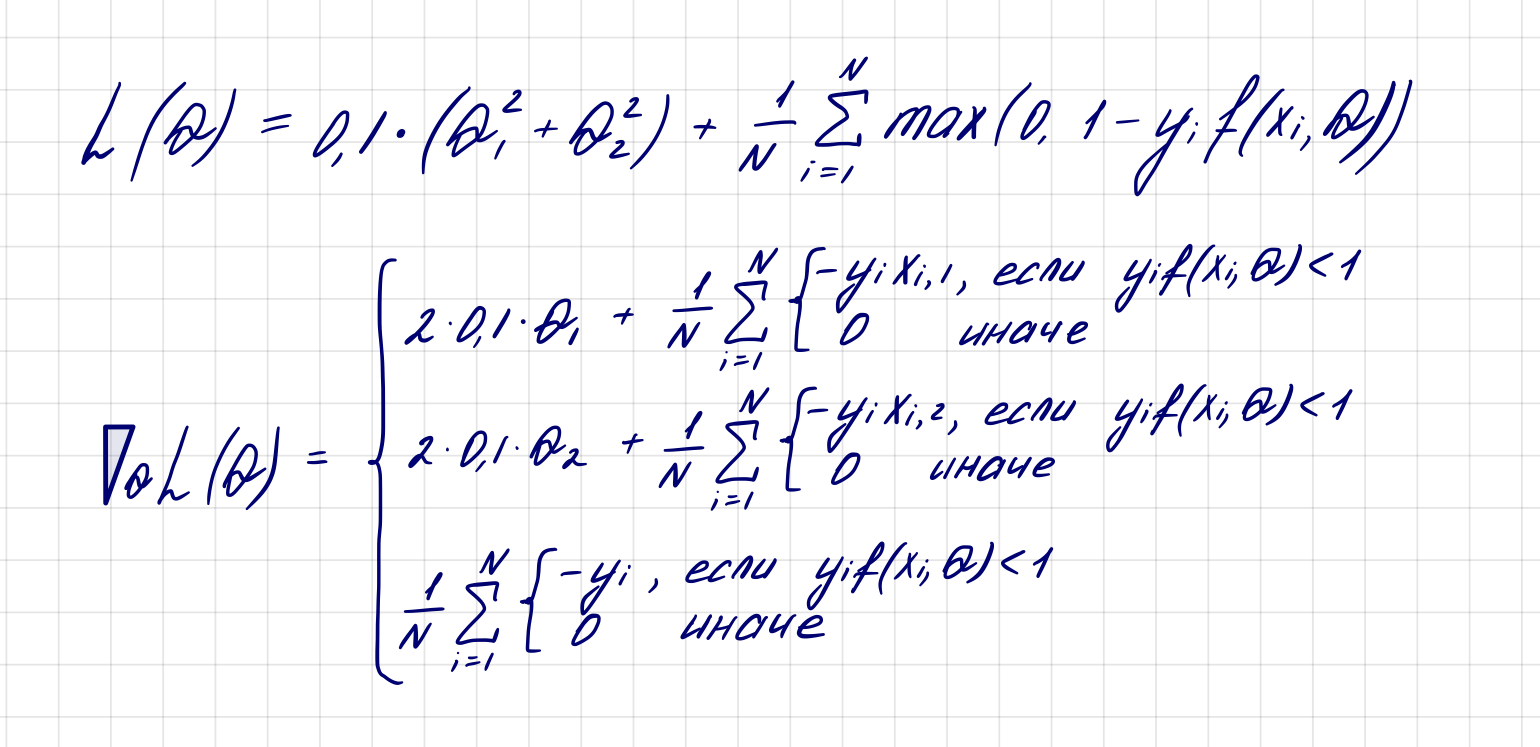

In [ ]:
# Update theta on each iteration
def update_theta(X, y, theta, lr, reg):
    # Count gradient
    grad = np.array([
        0.2 * theta[0] + np.mean([-y[i] * X[i, 0] if y[i] * f(X[i], theta) < 1
                                  else 0 for i in range(X.shape[0])]),
        0.2 * theta[1] + np.mean([-y[i] * X[i, 1] if y[i] * f(X[i], theta) < 1
                                  else 0 for i in range(X.shape[0])]),
        np.mean([-y[i] if y[i] * f(X[i], theta) < 1
                 else 0 for i in range(X.shape[0])])
    ])

    # add regularization
    reg_grad = np.array([reg * theta[i] for i in range(len(theta))])
    grad += reg_grad
    theta -= lr * grad
    return theta

# Main function of gradient descent
def gradient_descent(X, y, lr, theta, reg, num_iters=1000):
    for i in range(num_iters):
        theta = update_theta(X, y, theta, lr, reg)
    return theta

Теперь необходимо подобрать коэффициент регуляризации, который будет минимизировать loss. Сделаем это перебором

In [ ]:
reg_params = np.arange(0, 2, 0.1)  # generate a list of regularization coefficients

theta = theta0
best_loss = loss(X, y, theta0)
best_reg = 1

for reg in reg_params:
    theta1 = gradient_descent(X, y, lr, theta0, reg, num_iters=1000)
    current_loss = loss(X, y, theta1)

    if current_loss < best_loss:
        best_loss = current_loss
        theta = theta1
        best_reg = reg

In [ ]:
theta = gradient_descent(X, y, lr, theta, best_reg, num_iters=1000)

Как мы видим на исходных данных модель дала идеальный результат

In [ ]:
print("True values:", np.sign(f(X, theta0)))
print("Prediction:", np.sign(f(X, theta)))

True values: [ 1.  1.  1. -1. -1.]
Prediction: [ 1.  1.  1. -1. -1.]


In [ ]:
print("Prediction:", f(X, theta))
print("Loss:", loss(X, y, theta))

with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)

Prediction: [ 0.49437483  1.97303365  0.98392198 -0.73951042 -0.98929268]
Loss: 0.47505740016426745
